<a href="https://colab.research.google.com/github/SupriyaAnne/DocTalk-A-Comprehensive-Healthcare-Solutions-Platform/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
class SLR:

    def __init__(self):
        self.m = None
        self.b = None

    def fit(self, X_train, y_train):
        if len(X_train) != len(y_train) or len(X_train) < 2:
            raise ValueError("X_train and y_train must have the same length and at least two data points.")

        num = 0
        den = 0
        mean_x = sum(X_train) / len(X_train)
        mean_y = sum(y_train) / len(y_train)

        for i in range(len(X_train)):
            num += (X_train[i] - mean_x) * (y_train[i] - mean_y)
            den += (X_train[i] - mean_x) ** 2

        self.m = num / den
        self.b = mean_y - (self.m * mean_x)

    def predict(self, X_test):
        if self.m is None or self.b is None:
            raise ValueError("Model has not been trained. Call fit() first.")

        return [self.m * x + self.b for x in X_test]

# Example usage:
if __name__ == "__main__":
    X_train = [1, 2, 3, 4, 5]
    y_train = [2, 4, 5, 4, 5]
    slr = SLR()
    slr.fit(X_train, y_train)
    X_test = [6, 7, 8]
    predictions = slr.predict(X_test)
    print(predictions)


[5.8, 6.4, 7.0]


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/placement_cgpa (2).csv')

FileNotFoundError: ignored

In [ ]:
df.head()

NameError: ignored

In [ ]:
X = df.data[:-1]
y = df.data[-1].values

NameError: ignored

In [ ]:
X

array([6.89, 5.12, 7.82, 7.42, 6.94, 7.89, 6.73, 6.75, 6.09, 8.31, 5.32,
       6.61, 8.94, 6.93, 7.73, 7.25, 6.84, 5.38, 6.94, 7.48, 7.28, 6.85,
       6.14, 6.19, 6.53, 7.28, 8.31, 5.42, 5.94, 7.15, 7.36, 8.1 , 6.96,
       6.35, 7.34, 6.87, 5.99, 5.9 , 8.62, 7.43, 9.38, 6.89, 5.95, 7.66,
       5.09, 7.87, 6.07, 5.84, 8.63, 8.87, 9.58, 9.26, 8.37, 6.47, 6.86,
       8.2 , 5.84, 6.6 , 6.92, 7.56, 5.61, 5.48, 6.34, 9.16, 7.36, 7.6 ,
       5.11, 6.51, 7.56, 7.3 , 5.79, 7.47, 7.78, 8.44, 6.85, 6.97, 6.94,
       8.99, 6.59, 7.18, 7.63, 6.1 , 5.58, 8.44, 4.26, 4.79, 7.61, 8.09,
       4.73, 6.42, 7.11, 6.22, 7.9 , 6.79, 5.83, 6.63, 7.11, 5.98, 7.69,
       6.61, 7.95, 6.71, 5.13, 7.05, 7.62, 6.66, 6.13, 6.33, 7.76, 7.77,
       8.18, 5.42, 8.58, 6.94, 5.84, 8.35, 9.04, 7.12, 7.4 , 7.39, 5.23,
       6.5 , 5.12, 5.1 , 6.06, 7.33, 5.91, 6.78, 7.93, 7.29, 6.68, 6.37,
       5.84, 6.05, 7.2 , 6.1 , 5.64, 7.14, 7.91, 7.19, 7.91, 6.76, 6.93,
       4.85, 6.17, 5.84, 6.07, 5.66, 7.57, 8.28, 6.

In [ ]:
y

array([3.26, 1.98, 3.25, 3.67, 3.57, 2.99, 2.6 , 2.48, 2.31, 3.51, 1.86,
       2.6 , 3.65, 2.89, 3.42, 3.23, 2.35, 2.09, 2.98, 2.83, 3.16, 2.93,
       2.3 , 2.48, 2.71, 3.65, 3.42, 2.16, 2.24, 3.49, 3.26, 3.89, 3.08,
       2.73, 3.42, 2.87, 2.84, 2.43, 4.36, 3.33, 4.02, 2.7 , 2.54, 2.76,
       1.86, 3.58, 2.26, 3.26, 4.09, 4.62, 4.43, 3.79, 4.11, 2.61, 3.09,
       3.39, 2.74, 1.94, 3.09, 3.31, 2.19, 1.61, 2.09, 4.25, 2.92, 3.81,
       1.63, 2.89, 2.99, 2.94, 2.35, 3.34, 3.62, 4.03, 3.44, 3.28, 3.15,
       4.6 , 2.21, 3.  , 3.44, 2.2 , 2.17, 3.49, 1.53, 1.48, 2.77, 3.55,
       1.48, 2.72, 2.66, 2.14, 4.  , 3.08, 2.42, 2.79, 2.61, 2.84, 3.83,
       3.24, 4.14, 3.52, 1.37, 3.  , 3.74, 2.82, 2.19, 2.59, 3.54, 4.06,
       3.76, 2.25, 4.1 , 2.37, 1.87, 4.21, 3.33, 2.99, 2.88, 2.65, 1.73,
       3.02, 2.01, 2.3 , 2.31, 3.16, 2.6 , 3.11, 3.34, 3.12, 2.49, 2.01,
       2.48, 2.58, 2.83, 2.6 , 2.1 , 3.13, 3.89, 2.4 , 3.15, 3.18, 3.04,
       1.54, 2.42, 2.18, 2.46, 2.21, 3.4 , 3.67, 2.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
X_train.shape

(160,)

In [ ]:
lr = SLR()

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
X_train.shape[0]

160

In [ ]:
X_train[0]

7.14

In [ ]:
X_train.mean()

6.989937500000001

In [ ]:
X_test[0]

8.58

In [ ]:
predicted_value = lr.predict([X_test[0]])


print(predicted_value)

[3.8911160097442026]


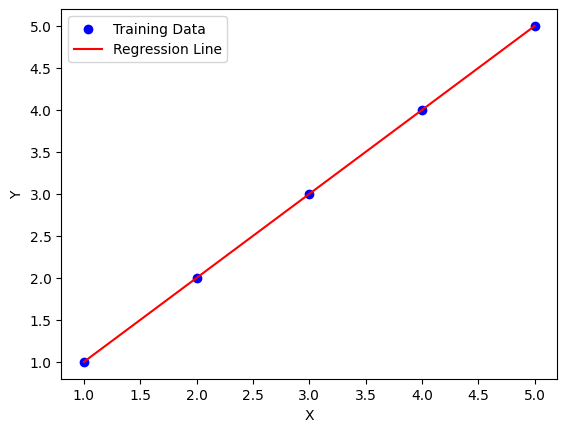

In [ ]:
import matplotlib.pyplot as plt

class SLR:

    def __init__(self):
        self.m = None
        self.b = None

    def fit(self, X_train, y_train):
        if len(X_train) != len(y_train) or len(X_train) < 2:
            raise ValueError("X_train and y_train must have the same length and at least two data points.")

        num = 0
        den = 0
        mean_x = sum(X_train) / len(X_train)
        mean_y = sum(y_train) / len(y_train)

        for i in range(len(X_train)):
            num += (X_train[i] - mean_x) * (y_train[i] - mean_y)
            den += (X_train[i] - mean_x) ** 2

        self.m = num / den
        self.b = mean_y - (self.m * mean_x)

    def predict(self, X_test):
        if self.m is None or self.b is None:
            raise ValueError("Model has not been trained. Call fit() first.")

        return [self.m * x + self.b for x in X_test]


if __name__ == "__main__":
    X_train
    y_train
    slr = SLR()
    slr.fit(X_train, y_train)

    predictions = slr.predict(X_test)


    plt.scatter(X_train, y_train, label="Training Data", color="blue")


    regression_line = [slr.m * x + slr.b for x in X_train]
    plt.plot(X_train, regression_line, label="Regression Line", color="red")


    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()


    plt.show()


<ipython-input-62-e5ab3134b4f5>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


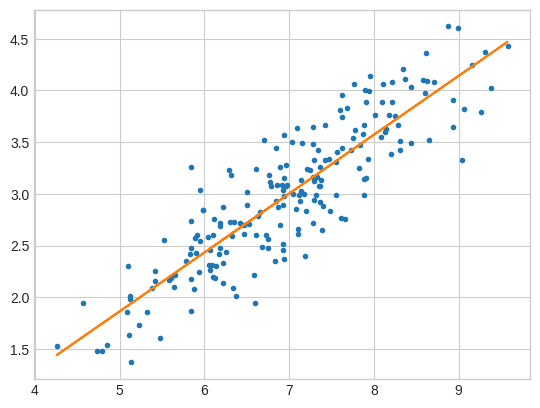

In [ ]:

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
m,b=np.polyfit(X,y,1)
plt.plot(X,y,'.')
plt.plot(X,m*X+b)

In [ ]:
mean_y = sum(y_train) / len(y_train)
k = sum((y_train[i] - predictions[i]) ** 2 for i in range(len(predictions)))
l= sum((y_train[i] - mean_y) ** 2 for i in range(len(y_train)))
r_squared = 1 - (k / l)
print("R-squared (R²) value:", r_squared)



R-squared (R²) value: -6.5


In [ ]:

mse = sum((y_train[i] - predictions[i]) ** 2 for i in range(len(predictions)))/len(predictions)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 25.0


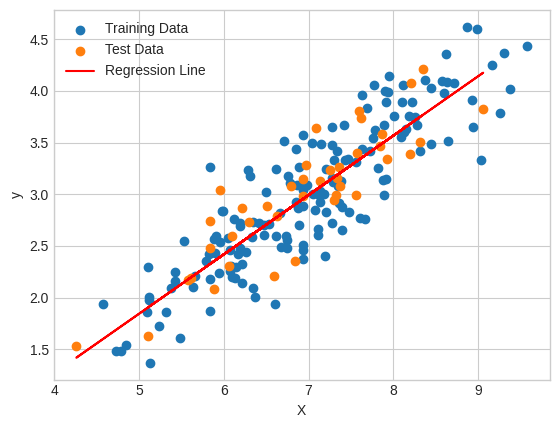

R squared value 0.7730984312051673
MSE value 0.08417638361329656


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

data = pd.read_csv('/placement_cgpa (2).csv')
X = data['cgpa'].values.reshape(-1, 1)
y = data['package'].values.reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


plt.scatter(X_train, y_train, label='Training Data')
plt.scatter(X_test, y_test, label='Test Data')
plt.plot(X_test, y_pred, 'r-', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
print("R squared value",r2)
print("MSE value",mse)

Accuracy: 1.0


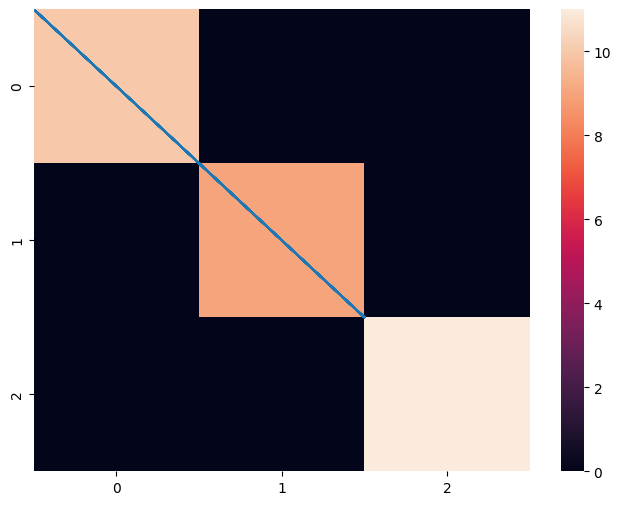

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Loading the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Making predictions
y_pred = logistic_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
conf=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf)
plt.plot(y_test,y_pred)
plt.show()